In [1]:
import numpy as np
import random
import pysam


In [2]:
bamfile = pysam.AlignmentFile('/Users/matteoppa/Documents/Bioinformatics/NA12878.bam', 'rb')

In [14]:
def count(f):
    c =0
    for i in f.fetch():
        c +=1
    return c
    f.close()

In [15]:
count(bamfile)

184835830

In [3]:
# count number of reads for chromesome 17 (chr17)

def count_c(f):
    i = 0
    for l in  f.fetch("chr17"):
        i += 1
    return i


In [4]:
count_c(bamfile)

4622671

In [7]:
chr17_bam=pysam.AlignmentFile("NA12878.chr17.bam", "wb", template=bamfile)

In [8]:
for read in bamfile.fetch("chr17"):
    chr17_bam.write(read)

#close file in order to index it
chr17_bam.close()

In [1]:
import seaborn as sns
import pandas as pd
import csv 

In [2]:
#Create  and clean the dataframe, We need to create column names in order to pass them to seaborn
column_names =["CHR", "POS", "DEPTH"]
df = pd.read_csv("chr17_depth.csv", sep="\t", names= column_names)

In [3]:
#Check if everything looks fine. The name of the columns are correct, now we can proceed with the data visualization
df[1:5]

,CHR,POS,DEPTH
1,chr17,60067,1
2,chr17,60068,1
3,chr17,60069,1
4,chr17,60070,1


/Users/matteoppa/Documents/Bioinformatics/Bio/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(0.0, 25.0)

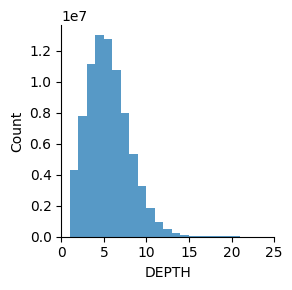

In [6]:
#Plot the Depth of the CH17 through Seaborn
ln = sns.displot(data=df, x="DEPTH", binwidth=1, height=3)
ax= ln.axes
ax[0,0].set_ylim(0,)
ax[0,0].set_xlim(0,25)



We can see that majority of our reads are composed of elements of depth 5, which is consistent to the fact that the dataset is the result of an experiment with shallow sequencing.